# Memory Allocation using the First Fit Free List method

__Summary__: This is some python code that simulates the behavior of the C library functions `malloc` and `free`. The underlying data structure is a linked list whose records represent blocks of memory with __address__ and __size__ metadata. The linked list structure itself is called the __free list__. The smallest unit of allocatable memory is defined by the __page size__. The behvaior of the respective functions is defined below:

`malloc` - The memory is allocated according to the first fit method. The free list is searched for a block of memory greater than or equal in size to the request. If the block of memory found is larger than the requested size, then the remainder is _split_ off and added to the free list as new record. 

`free` - Freeing blocks of memory means updating the record for the freed block and also _merging_ the newly freed blocks with any contiguous blocks that might also be free. This operation is known as __coalescence__ [1]. This means that, again, a search is performed upon every invocation of `free`.

### Further Reading:

[1] https://www.memorymanagement.org/mmref/alloc.html

[2] https://en.wikipedia.org/wiki/C_dynamic_memory_allocation


## Simulation: Memory Allocation under Random Requests

Random amounts of memory will be requested, allocated and possibly freed in the below simulation loop. The animation shows the heap. The allocated memory blocks are black and the free blocks are white.

<IPython.core.display.Javascript object>


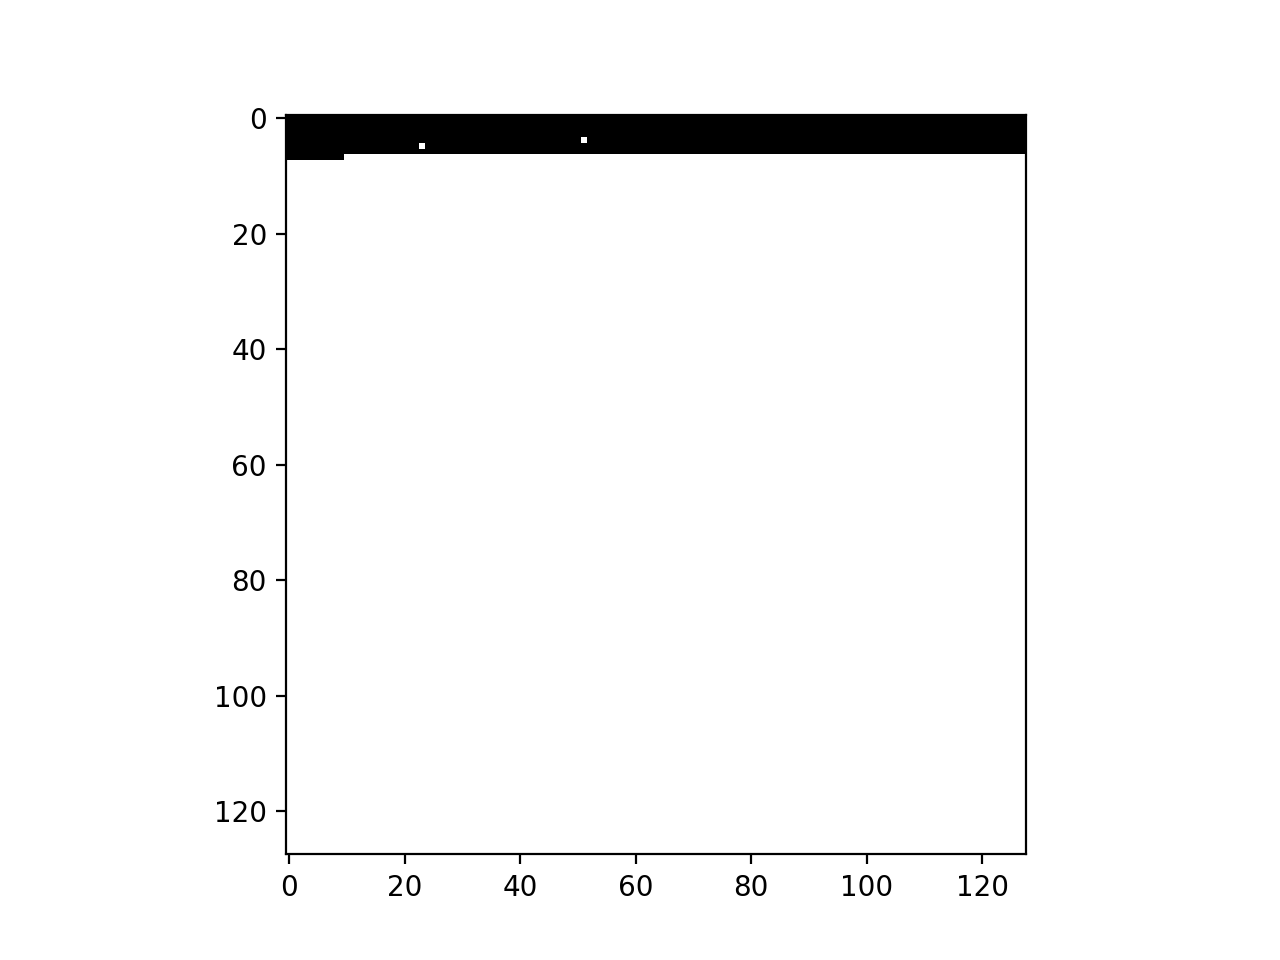

In [1]:
%matplotlib notebook
import numpy as np
from FFLFMemAlloc import *
import matplotlib.pyplot as plt



#parameters
N = 1000
N_r = 100000
min_request_size = 1
max_request_size = 1024 #in units of pages
page_size = 4
heap_size = 2**16 #in units of pages
p = 0.95 # Bernoulli probability of malloc vs. free (affects how much of the heap is used in sim)

#set random seed and populate dictionary of random memory requests
np.random.seed(2)
requests = np.arange(min_request_size,max_request_size,N_r)*page_size


#initialize free list data structure
fl = FreeList(heap_size,page_size)



#initialize heap visualization
m = fl.asMatrix()
fig,ax = plt.subplots(1,1)
im = ax.imshow(m,cmap='gray', vmin=0, vmax=1)

allocated_addresses = set()

#simulation loop
for i in range(0,N):
    
    #coin toss to decide if malloc or free invoked
    x = np.random.binomial(1,p)
    
    if x:
        r = np.random.choice(requests) 
        address=fl.malloc(r)  
        allocated_addresses.add(address)
             
    else:
        l = list(allocated_addresses)
        if l:
            address = np.random.choice(l)
            fl.free(address)
            allocated_addresses.remove(address)
    
    m = fl.asMatrix()
    
    im.set_data(m)
    fig.canvas.draw()
    plt.pause(0.001)
  